# Predicting Price Using Regression

In this notebook we will be working on the data set on houses from King's county. The **aim** of the notebook is to build a linear regression model which can help us predict sales price of houses in King's county. During the process we hope to find interesting relationship between different variables and select features that are most predictive utility. 

In order to begin analysis, the first thing we need to do is to set up our system by importing the appropriate libraries and the dataset we will be using.

In [4]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# import folium
# from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)


df = pd.read_csv('kc_house_data.csv')


In [5]:
print("King's county data set has {} rows and {} columns".format(df.shape[0], df.shape[1]))
df.sample(10)

King's county data set has 21597 rows and 21 columns


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
156,6388930390,11/20/2014,650000.0,5,3.50,3960,25245,2.0,0.0,0.0,...,9,2500,1460.0,1996,0.0,98056,47.5250,-122.172,2640,13675
15572,2128000050,8/15/2014,625000.0,4,2.25,2070,7200,1.0,0.0,0.0,...,8,1390,680.0,1977,0.0,98033,47.6970,-122.169,2110,8400
2080,4401200350,2/10/2015,822500.0,3,2.50,3090,7708,2.0,0.0,0.0,...,10,3090,0.0,1999,0.0,98052,47.6868,-122.108,3140,8592
17522,3356402232,9/24/2014,179900.0,3,1.75,1230,12000,1.0,NaN,0.0,...,6,1230,0.0,1970,0.0,98001,47.2878,-122.251,1550,12000
8360,2212600100,5/22/2014,370000.0,4,2.75,3150,67518,1.0,NaN,0.0,...,9,2250,900.0,1965,0.0,98092,47.3382,-122.196,2210,32391
12832,9430110120,5/5/2015,737000.0,3,2.50,2300,7800,2.0,0.0,2.0,...,9,2300,0.0,1997,0.0,98052,47.6842,-122.155,2300,8187
17280,5126310470,1/15/2015,515500.0,4,2.75,2830,8126,2.0,0.0,0.0,...,8,2830,0.0,2005,NaN,98059,47.4863,-122.140,2830,7916
7583,8121100147,7/14/2014,390000.0,3,2.25,1640,2875,2.0,0.0,0.0,...,6,1240,400.0,1983,0.0,98118,47.5686,-122.286,1500,3960
19963,1085623710,7/14/2014,447055.0,4,2.50,2448,4949,2.0,0.0,0.0,...,9,2448,0.0,2014,0.0,98030,47.3428,-122.179,2815,5446
1754,3295610350,3/23/2015,850000.0,5,2.75,3430,15119,2.0,0.0,0.0,...,10,3430,0.0,1998,0.0,98075,47.5678,-122.032,3430,12045


In order to build our model we need to first understand our dataset and the variables that compose them. This dataset has 21597 observation and 21 columns. Out of these the ID has no predictive utility and so we have 19 variables to work with. The data dictionary provides the following information about them

* **dateDate** - house was sold
* **price** - Price is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** -  Number of bathrooms/bedrooms
* **sqft_living** - square-footage of the home
* **sqft_lots** - square-footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

I have chosen to see a random sample from the dataset just so that I can be sure that the file was read correctly and to get an idea of what's going on with the data. It also helps me to check for any missing values in the dataset. 

Since I can see some missing values and '?' in the data I would like to carry out more analysis to see the datatype and number of non-null values. I would also like to get a summary of all of our variables.

In [6]:
df.info()
df[['price','sqft_living','sqft_lot']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


,price,sqft_living,sqft_lot
count,2.159700e+04,21597.000000,2.159700e+04
mean,5.402966e+05,2080.321850,1.509941e+04
std,3.673681e+05,918.106125,4.141264e+04
min,7.800000e+04,370.000000,5.200000e+02
25%,3.220000e+05,1430.000000,5.040000e+03
50%,4.500000e+05,1910.000000,7.618000e+03
75%,6.450000e+05,2550.000000,1.068500e+04
max,7.700000e+06,13540.000000,1.651359e+06


Of all of the columns I am more intuitively interested in the square footage are and lot size of the property. From first assumption it would seem that they would be a good indicator of what the property is worth as unlike bedrooms or bathrooms it ca't be changed easily without a substantial financial investment. 

Since our data set doesnt contain any missing values in the **'sqft_living'** column, and its datatype is alright, it also doesnt have any value starting from 0. So I would like to explore its relationship with price on its own before I make any changes to the data set during preprocessing. 

We will begin by first looking at the distribution of price and sqft_living before we plot and scatter plot to see their relationship.

Skewness: 4.023365
Kurtosis: 34.541359


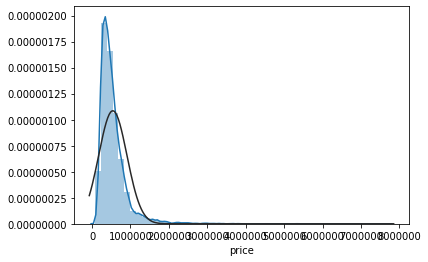

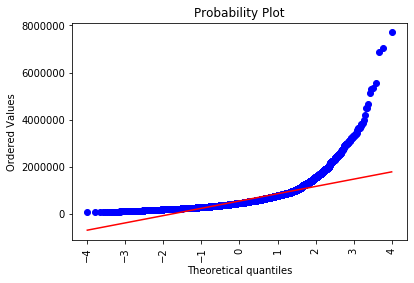

In [7]:
# plotting a histogram of price data and plotting a normal probability plot
sns.distplot(df['price'], fit=norm);
fig = plt.figure()
plt.xticks(rotation=90);
res = stats.probplot(df['price'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 1.473215
Kurtosis: 5.252102


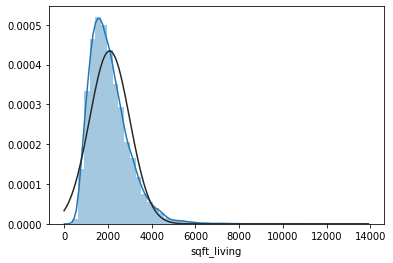

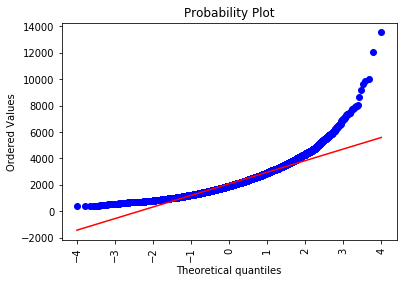

In [8]:
# plotting a histogram of price data and plotting a normal probability plot
sns.distplot(df['sqft_living'], fit=norm);
fig = plt.figure()
plt.xticks(rotation=90);
res = stats.probplot(df['sqft_living'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % df['sqft_living'].skew())
print("Kurtosis: %f" % df['sqft_living'].kurt())

We can note that both of the variables don't have a perfectly normal distribution, but they each have a positive skewness and show peakedness. Both are much higher in the price distribution. We may have to transform these variables to make them more normally distributed.

Before we make any transformation I will create a subset of the data containing only the columns of interest. I will also be carrying out a scatter plot before we do any transformation just to check if they have any linear relationship.

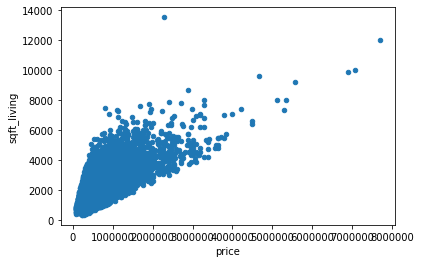

In [9]:
# create a subset
df_1 = df[['price', 'sqft_living']]

# plot the scatter plot
df_1.plot.scatter('price','sqft_living')

It seems that they have a linear realtionship and so we can prepare to transform them and check how well they can be used to predict house prices.

I will carry out the simple regression on both the original data and the normalized data to see if normalisig the variables had any major significance.

### Normalising our variables.

We notice that price of house is deviating a lot from normal, but we can fix it by doing a simple data transformation. From my reading I have found out that in case of positive skewness we can perform a log transformation of the values. It can be done quite simply in few steps.

In [10]:
# applying log transformation for both columns
df_1['normal_price'] = np.log(df_1['price'])
df_1['normal_sqft_living'] = np.log(df_1['sqft_living'])

Skewness: 0.431004
Kurtosis: 0.691049


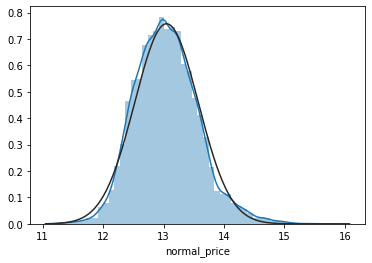

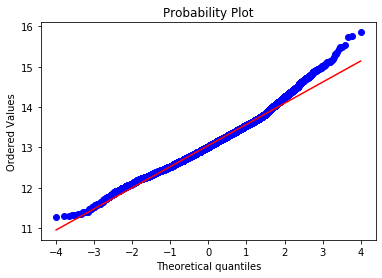

In [11]:
#transformed histogram and normal probability plot
sns.distplot(df_1['normal_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_1['normal_price'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % df_1['normal_price'].skew())
print("Kurtosis: %f" % df_1['normal_price'].kurt())

Skewness: -0.027362
Kurtosis: -0.079038


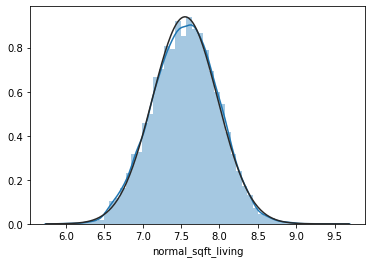

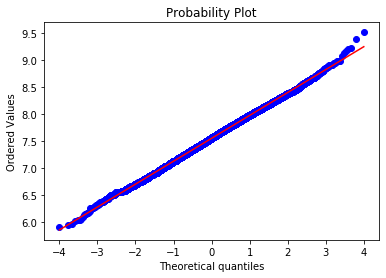

In [12]:
#transformed histogram and normal probability plot
sns.distplot(df_1['normal_sqft_living'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_1['normal_sqft_living'], plot=plt)

#skewness and kurtosis
print("Skewness: %f" % df_1['normal_sqft_living'].skew())
print("Kurtosis: %f" % df_1['normal_sqft_living'].kurt())

Ok now that we transformed our data we can see that it shows signs of normal distribution with acceptable values for skewness and kurtosis.

We can therefore start our first ordinary least square regression model using statsmodel.

In [18]:
import statsmodels.api as sm

X = df_1['sqft_living']
y = df_1['price']
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))
results.summary()

R2 = 0.49
const         -43988.8922
sqft_living      280.8630
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:32:16   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
import statsmodels.api as sm

X = df_1['normal_sqft_living']
y = df_1['normal_price']
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))
results.summary()

R2 = 0.46
const                 6.7234
normal_sqft_living    0.8376
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           normal_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:33:25   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.7234      0.047    142.612      0.000       6.631       6.816
normal_sqft_living     0.8376      0.006    134.368      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusions drawn from first analysis

I also printed the intercept and coefficient for the ordinary least square linear regression. By using these values and the below definition, we can estimate the house prices manually. The equation we use for our estimations is called hypothesis function and defined as

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x$$

Suprisingly by normalising the data we loose some of the predictive power afforded by sqft_living. We see that the r2 for orignal data is 0.493 but after normalising the data we get r2 of 0.455. Even though the difference is not a lot I would still prefer to work with original data for conveinience. For next stage of analysis we are going to ingnore normal data and perform all analysis only on the original price. Before we can begin that we will need to clean and process our data to get it ready for next stage of analysis.

## Second stage:

From the initial summary information we obtained about our data we noticed that some columns had missing value. We will have to explore that further and in order to understand what we can do about those missing values we will carry out a correlation matrix. The correlation matrix would help us to identify and divert our attention only towards the important features of our data. 

In [20]:
""" We need to first get a count of missing values in our dataset"""

# get the number of missing data points per column
df_miss = df.isnull().sum()

# look at the columns with more than 0 missing values
df_miss[df_miss > 0]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

Only three columns have missing values, before we can approach to deal with the missing dataset I will chart a heatmap of correlation.

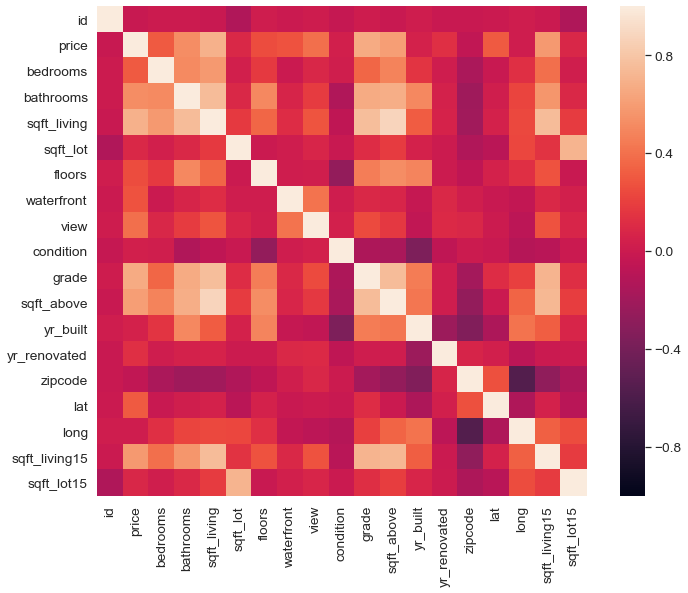

In [21]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin= -1, vmax= 1, square=True);

We can see that there is many orange coloured squares showing relationship with price. The first one refers to 'bedrooms', 'bathrooms', sqft_living, grade, sqft_above. Actually, the correlation between these variables are so strong that it can indicate a situaton of multicollinearity. If we think about it most of these variables are conveying the same information.

This heatmap shows too many variables, also many variables are categorical and so their correlation cannot be easily ascertained. Going further I will filter the heatmap to show only those variables which are most strongly correlated with price.

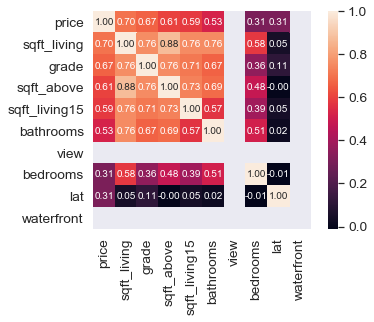

In [22]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

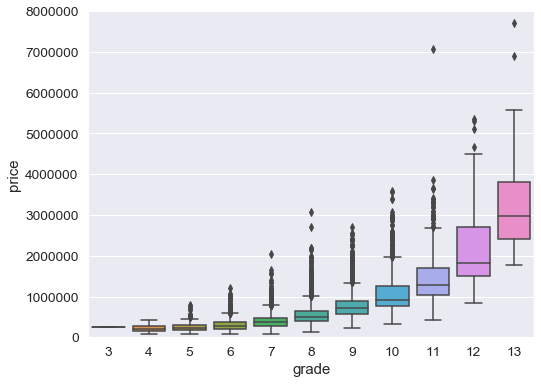

In [24]:
#box plot overallqual/saleprice
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

In [25]:
import statsmodels.api as sm

X = df[['grade', 'sqft_living', 'floors', 'sqft_above']]
y = df_1['price']
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))
results.summary()

R2 = 0.54
const         -650795.2200
grade          113613.3674
sqft_living       227.1825
floors         -21901.2849
sqft_above        -66.4430
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6388.
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:39:04   Log-Likelihood:            -2.9896e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.980e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.508e+05   1.36e+04    -47.787      0.000   -6.77e+05   -6.24e+05
grade        1.136e+05   2377.804     47.781      0.000    1.09e+05    1.18e+05
sqft_living   227.1825      4.246     53.501      0.000     218.859     235.506
floors       -2.19e+04   3896.857     -5.620      0.000   -2.95e+04   -1.43e+04
sqft_above    -66.4430      4.885    -13.600      0.000     -76.019     -56.867
==============================================================================
Omnibus:                    17016.798   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1045900.418
Skew:                           3.308   Prob(JB):                         0.00
Kurtosis:                      36.444   Cond. No.                     2.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""